In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms.functional as TF

In [2]:
train_folder = "data/UTKFace/train/"
test_folder = "data/UTKFace/test/"
valid_folder = "data/UTKFace/valid/"
calib_folder = "data/UTKFace/calib/"

gender_labels = [
    "Male",
    "Female"
]

ethnic_labels = [
    "White",
    "Black",
    "Asian",
    "Indian",
    "Others"
]

In [3]:
def get_df(folder):
    img_path = os.path.join(folder, "images")
    labels_path = os.path.join(folder, "labels")
    data = []
    for file in os.listdir(img_path):
        label_file = os.path.join(labels_path, file.replace(".jpg", ".txt"))
        if os.path.exists(label_file):
            with open(label_file, "r") as f:
                content = f.read().strip()
                if content:
                    gender_class, ethnic_class = content.split()
                    data.append(
                        {
                            "Filename": file,
                            "Gender Class": gender_labels[int(gender_class)],
                            "Ethnic Class": ethnic_labels[int(ethnic_class)],
                        }
                    )

    return pd.DataFrame(data)

In [4]:
df_train = get_df(train_folder)
df_test = get_df(test_folder)
df_val = get_df(valid_folder)
df_cal = get_df(calib_folder)
dfs = {"Train": df_train, "Test": df_test, "Valid": df_val, "Calib": df_cal}

In [5]:
gender_counts = {}
ethnic_counts = {}

for name, df in dfs.items():
    gender_counts[name] = (
        df["Gender Class"].value_counts().reindex(gender_labels, fill_value=0)
    )
    ethnic_counts[name] = (
        df["Ethnic Class"].value_counts().reindex(ethnic_labels, fill_value=0)
    )

gender_counts_df = pd.DataFrame(gender_counts)
ethnic_counts_df = pd.DataFrame(ethnic_counts)
gender_counts_df["Total"] = gender_counts_df.sum(axis=1)
ethnic_counts_df["Total"] = ethnic_counts_df.sum(axis=1)

print("Number of images per color in each dataset:")
display(gender_counts_df)

print("\nNumber of images per type in each dataset:")
display(ethnic_counts_df)

Number of images per color in each dataset:


,Train,Test,Valid,Calib,Total
Gender Class,,,,,
Male,7527,1893,1305,1856,12581
Female,6935,1722,1105,1759,11521



Number of images per type in each dataset:


,Train,Test,Valid,Calib,Total
Ethnic Class,,,,,
White,6087,1559,1048,1527,10221
Black,2771,687,439,661,4558
Asian,2182,491,372,541,3586
Indian,2433,615,374,605,4027
Others,989,263,177,281,1710


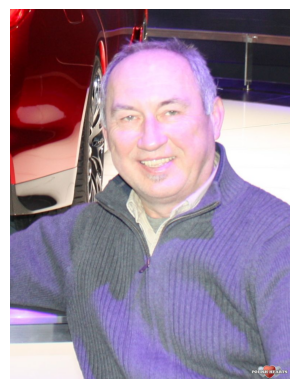

tensor([0.2510, 0.0235, 0.0196])

In [6]:
image = Image.open(
    os.path.join(train_folder, "images", df_train["Filename"].values[0])
).convert("RGB")
plt.imshow(image)
plt.axis("off")
plt.show()
image = TF.to_tensor(image)
image[:, 128, 128]

<Figure size 1200x600 with 0 Axes>

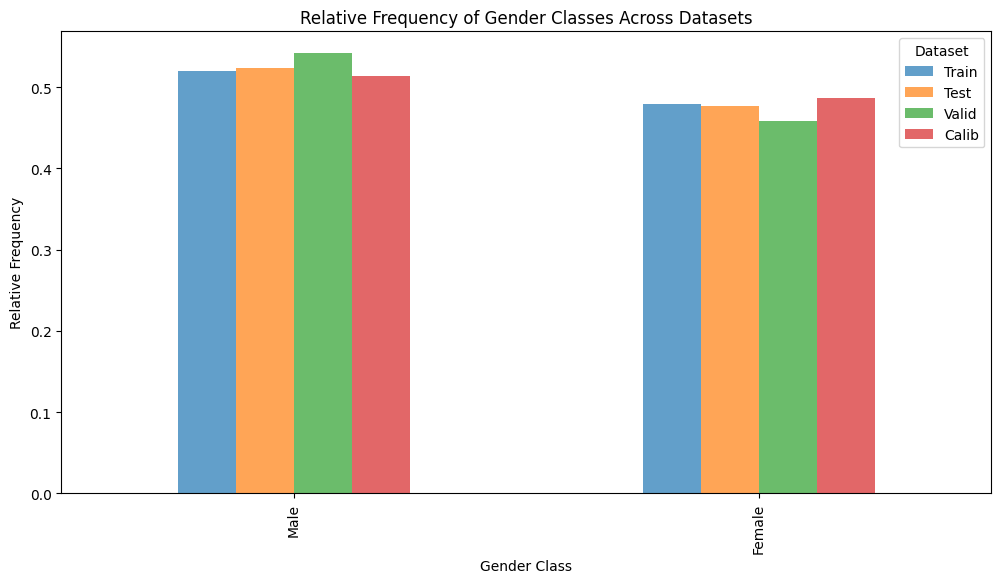

<Figure size 1200x600 with 0 Axes>

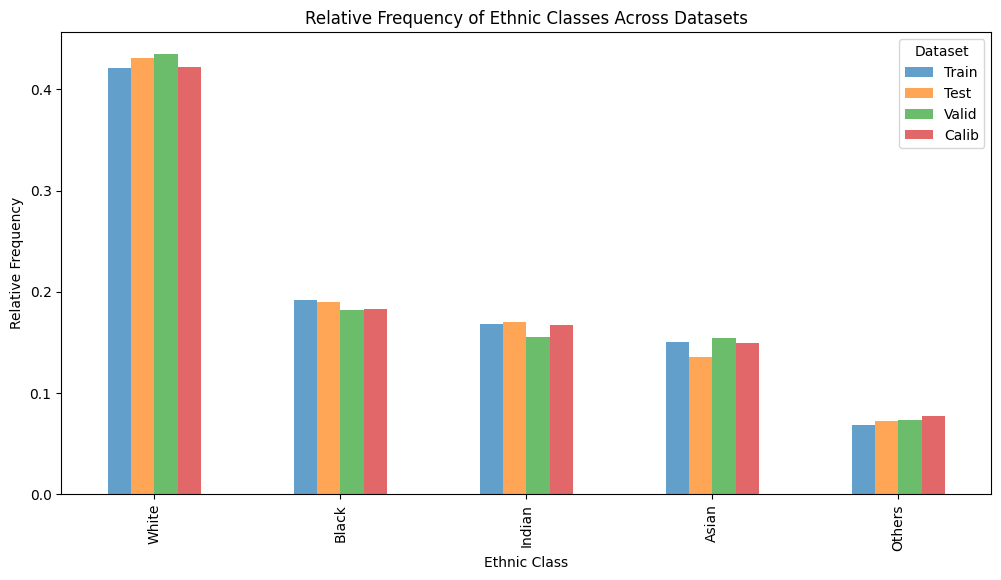

In [7]:
def plot_class_distribution(dfs: dict[str, pd.DataFrame], class_name):
    color_ratios = pd.DataFrame(
        {
            "Train": dfs["Train"][f"{class_name} Class"].value_counts(normalize=True),
            "Test": dfs["Test"][f"{class_name} Class"].value_counts(normalize=True),
            "Valid": dfs["Valid"][f"{class_name} Class"].value_counts(normalize=True),
            "Calib": dfs["Calib"][f"{class_name} Class"].value_counts(normalize=True),
        }
    ).fillna(0)

    plt.figure(figsize=(12, 6))
    color_ratios.plot(kind="bar", figsize=(12, 6), alpha=0.7)
    plt.title(f"Relative Frequency of {class_name} Classes Across Datasets")
    plt.xlabel(f"{class_name} Class")
    plt.ylabel("Relative Frequency")
    plt.legend(title="Dataset")
    plt.show()


plot_class_distribution(dfs, "Gender")
plot_class_distribution(dfs, "Ethnic")

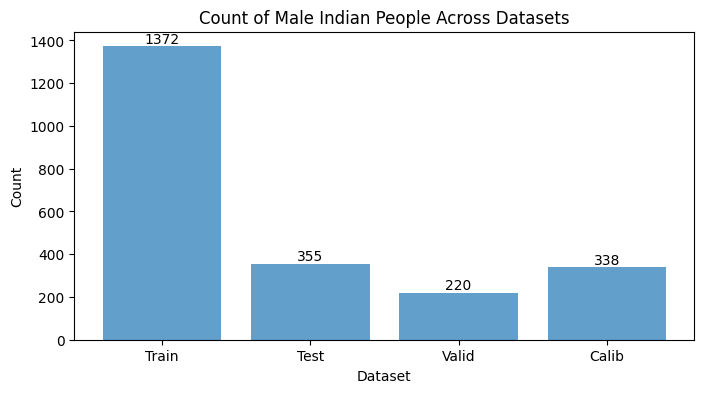

In [8]:
gender_class = 0
ethnic_class = 3


def count_vehicle(dfs, gender_class, ethnic_class):
    count = {}
    for name, df in dfs.items():
        count[name] = len(
            df[
                (df["Gender Class"] == gender_labels[gender_class])
                & (df["Ethnic Class"] == ethnic_labels[ethnic_class])
            ]
        )
    return count


def plot_vehicle_count(dfs, gender_class, ethnic_class):
    count = count_vehicle(dfs, gender_class, ethnic_class)
    plt.figure(figsize=(8, 4))
    plt.bar(count.keys(), count.values(), alpha=0.7)
    plt.title(
        f"Count of {gender_labels[gender_class]} {ethnic_labels[ethnic_class]} People Across Datasets"
    )
    for i, (_, value) in enumerate(count.items()):
        plt.text(i, value, str(value), ha="center", va="bottom")
    plt.xlabel("Dataset")
    plt.ylabel("Count")
    plt.show()


plot_vehicle_count(dfs, gender_class, ethnic_class)